In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# setting options to display max rows and columns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# loading the dataset

df = pd.read_csv(r"D:\Data Science Bootcamp\ML\Session 05\marketing_campaign.csv", delimiter='\t')

### **Attributes**

### 1. People
- ID: Customer's unique identifier  
- Year_Birth: Customer's birth year  
- Education: Customer's education level  
- Marital_Status: Customer's marital status  
- Income: Customer's yearly household income  
- Kidhome: Number of children in customer's household  
- Teenhome: Number of teenagers in customer's household  
- Dt_Customer: Date of customer's enrollment with the company  
- Recency: Number of days since customer's last purchase  
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

### 2. Products  
- MntWines: Amount spent on wine in last 2 years  
- MntFruits: Amount spent on fruits in last 2 years  
- MntMeatProducts: Amount spent on meat in last 2 years  
- MntFishProducts: Amount spent on fish in last 2 years  
- MntSweetProducts: Amount spent on sweets in last 2 years  
- MntGoldProds: Amount spent on gold in last 2 years  

### 3. Promotion
- NumDealsPurchases: Number of purchases made with a discount  
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise  
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise  
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise  
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise  
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise  
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise  

### 4. Place
- NumWebPurchases: Number of purchases made through the company’s website  
- NumCatalogPurchases: Number of purchases made using a catalogue  
- NumStorePurchases: Number of purchases made directly in stores  
- NumWebVisitsMonth: Number of visits to company’s website in the last month  


### **Target**
Need to perform clustering to summarize customer segments.

## Data Exploration

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [7]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:
# Count of unique values for categorical features
categorical_features = ['Education', 'Marital_Status']
categorical_unique_counts = {col: df[col].nunique() for col in categorical_features}

print(categorical_unique_counts)

{'Education': 5, 'Marital_Status': 8}


In [9]:
# Frequency distribution of the categorical features
categorical_frequency = {col: df[col].value_counts() for col in categorical_features}

print(categorical_frequency)

{'Education': Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64, 'Marital_Status': Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64}


In [10]:
# Checking nul values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

## Data Preprocessing

### Dropping missing values and constant columns

In [11]:
# Dropping constant features: Z_CostContact and Z_Revenue
df_dropped = df.drop(columns=['Z_CostContact', 'Z_Revenue'])

# Handling missing values in the 'Income' column 
df_cleaned = df_dropped.dropna(subset=['Income'])

df_cleaned.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


### Identifying and dealing with outliers

In [12]:
# Exploring the 'Year_Birth' column for potential outliers
year_birth_stats = df_cleaned['Year_Birth'].describe()

# Identifying potential outliers using IQR method
Q1 = year_birth_stats['25%']
Q3 = year_birth_stats['75%']
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Counting outliers
outliers = df_cleaned[(df_cleaned['Year_Birth'] < lower_bound) | (df_cleaned['Year_Birth'] > upper_bound)]
outlier_count = outliers.shape[0]

print(year_birth_stats)
print(lower_bound)
print(upper_bound)
print(outlier_count)
outliers['Year_Birth'].sort_values().unique()

count    2216.000000
mean     1968.820397
std        11.985554
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64
1932.0
2004.0
3


array([1893, 1899, 1900], dtype=int64)

In [13]:
# Printing the rows with the outliers in the 'Year_Birth' column
outlier_rows = df_cleaned[df_cleaned['Year_Birth'].isin([1893, 1899, 1900])]
outlier_rows

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0


In [14]:
# Dropping the rows with outliers in the 'Year_Birth' column
df_cleaned_no_outliers = df_cleaned.drop(outlier_rows.index)

# Verifying the removal by checking if these rows still exist in the cleaned dataframe
verification = df_cleaned_no_outliers[df_cleaned_no_outliers['Year_Birth'].isin([1893, 1899, 1900])]
verification.empty, df_cleaned_no_outliers.shape

(True, (2213, 27))

### Dealing with issues in categorical columns

In [15]:
# Dealing with issues in Marital_Status column
marital_status_counts = df_cleaned_no_outliers['Marital_Status'].value_counts()

marital_status_counts

Marital_Status
Married     857
Together    572
Single      470
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [16]:
# Replace "Alone" with "Single" in Marital_Status
df_cleaned_no_outliers['Marital_Status'].replace('Alone', 'Single', inplace=True)

In [17]:
# Drop rows where Marital_Status is "Absurd" or "YOLO"
df_cleaned_no_outliers = df_cleaned_no_outliers[~df_cleaned_no_outliers['Marital_Status'].isin(['Absurd', 'YOLO'])]

# New value counts for Marital_Status after the replacements and drops
new_marital_status_counts = df_cleaned_no_outliers['Marital_Status'].value_counts()

new_marital_status_counts

Marital_Status
Married     857
Together    572
Single      473
Divorced    231
Widow        76
Name: count, dtype: int64

In [18]:
# Previewing value counts in Education
education_counts = df_cleaned_no_outliers['Education'].value_counts()

education_counts

Education
Graduation    1115
PhD            478
Master         364
2n Cycle       198
Basic           54
Name: count, dtype: int64

### Dealing with Date Feature: Dt_Customer

In [19]:
# Convert Dt_Customer column to datetime format
df_cleaned_no_outliers['Dt_Customer'] = pd.to_datetime(df_cleaned_no_outliers['Dt_Customer'], format='%d-%m-%Y')

# Finding the earliest and latest date in the Dt_Customer column
earliest_date = df_cleaned_no_outliers['Dt_Customer'].min()
latest_date = df_cleaned_no_outliers['Dt_Customer'].max()

# Calculating customer tenure as days from Dt_Customer to the current date
current_date = datetime.now()
df_cleaned_no_outliers['Customer_Tenure_Days'] = (current_date - df_cleaned_no_outliers['Dt_Customer']).dt.days

# Displaying the earliest and latest date, and the first few rows to see the new column
earliest_date, latest_date, df_cleaned_no_outliers[['Dt_Customer', 'Customer_Tenure_Days']].head()

(Timestamp('2012-07-30 00:00:00'),
 Timestamp('2014-06-29 00:00:00'),
   Dt_Customer  Customer_Tenure_Days
 0  2012-09-04                  4167
 1  2014-03-08                  3617
 2  2013-08-21                  3816
 3  2014-02-10                  3643
 4  2014-01-19                  3665)

### Label Encoding

In [20]:
marital_status_encoded = pd.get_dummies(df_cleaned_no_outliers['Marital_Status'], prefix='Marital')
df_encoded = df_cleaned_no_outliers.join(marital_status_encoded)

In [21]:
education_hierarchy = {'Basic': 1, 'Graduation': 2, '2n Cycle': 3, 'Master': 4, 'PhD': 5}
df_encoded['Education_Encoded'] = df_encoded['Education'].map(education_hierarchy)

### Dropping columns we don't need anymore

In [22]:
# Since we have encoded marital status and education also created a useful feature from Dt Customer, we can drop these
df_final = df_encoded.drop(columns=['Marital_Status', 'Education', 'Dt_Customer'])

### Data Transformation

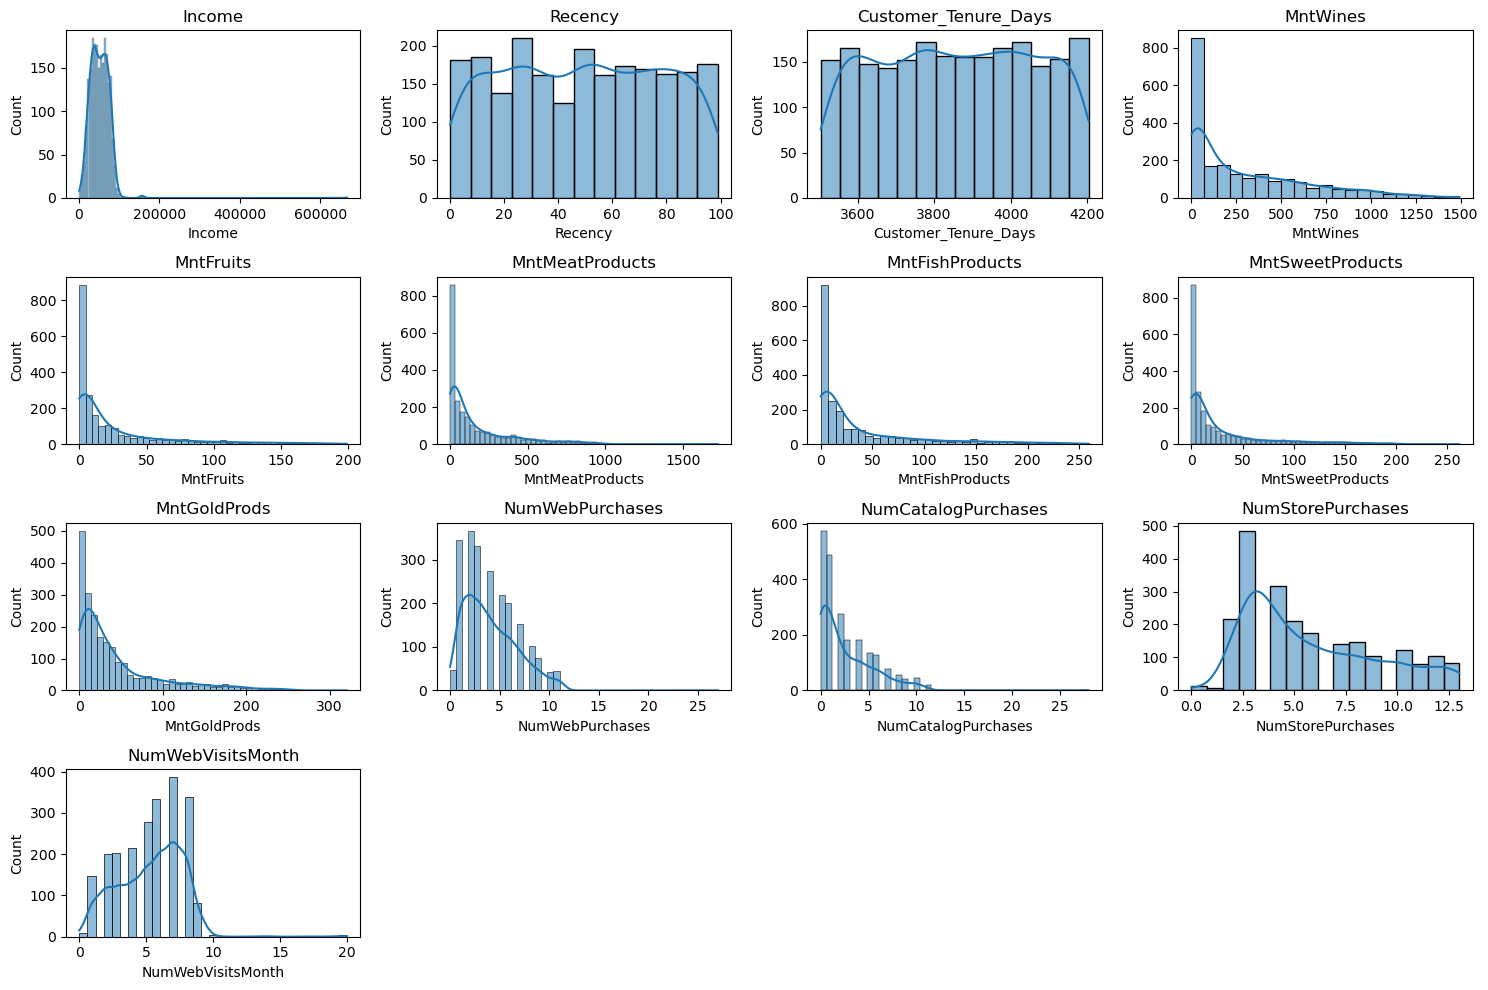

In [23]:
# Columns to be visualized
columns_to_visualize = ['Income', 'Recency', 'Customer_Tenure_Days', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Plotting distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_visualize):
    plt.subplot(4, 4, i+1)
    sns.histplot(df_cleaned_no_outliers[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [24]:
# Creating separate dataframes for standardization and normalization
df_standardized = df_final.copy()
df_normalized = df_final.copy()

# List of columns to be scaled
columns_to_scale = ['Income', 'Recency', 'Customer_Tenure_Days', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Applying standardization
scaler = StandardScaler()
df_standardized[columns_to_scale] = scaler.fit_transform(df_standardized[columns_to_scale])

# Applying normalization
normalizer = MinMaxScaler()
df_normalized[columns_to_scale] = normalizer.fit_transform(df_normalized[columns_to_scale])

## Clustering

### K-Means Clustering

In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(df_standardized)
labels_kmeans = kmeans.labels_

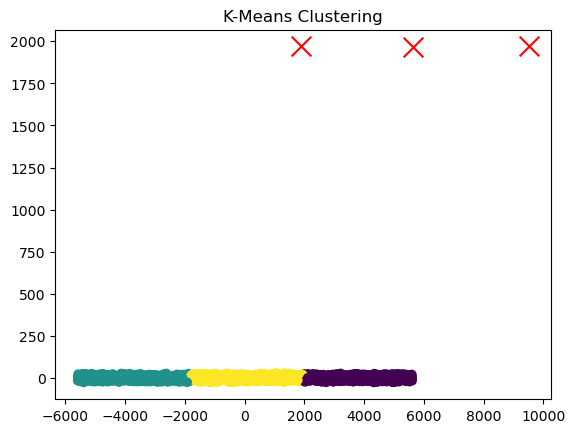

In [26]:
pca = PCA(n_components=2)  
reduced_data = pca.fit_transform(df_standardized)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels_kmeans)  # Assuming labels_kmeans are your K-Means cluster labels
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='red')  # Plot centroids
plt.title("K-Means Clustering")
plt.show()

In [27]:
print("Centroids:\n", kmeans.cluster_centers_)

Centroids:
 [[ 9.51088953e+03  1.96924128e+03  1.79294188e-02  4.31686047e-01
   5.07267442e-01 -7.11705606e-02 -3.87446480e-02  1.57299918e-02
  -1.59481111e-02 -2.43902733e-02  1.31301786e-02 -3.43376599e-02
   2.26017442e+00 -3.22630186e-02 -2.63531363e-02 -2.79058604e-02
  -2.40382265e-02  6.54069767e-02  6.39534884e-02  6.83139535e-02
   5.81395349e-02  1.30813953e-02  1.16279070e-02  1.38081395e-01
  -6.60915419e-04  8.57558140e-02  4.06976744e-01  2.02034884e-01
   2.64534884e-01  4.06976744e-02  3.00872093e+00]
 [ 1.90257697e+03  1.96927711e+03 -1.55395827e-02  4.39089692e-01
   5.10040161e-01  2.97489469e-02  1.72007044e-02  8.54648713e-03
  -1.55014575e-03  2.34376709e-02  9.31937623e-03  4.18903676e-03
   2.43239625e+00 -1.89975821e-02 -2.63085525e-02  8.26625771e-03
   5.46523994e-03  8.29986613e-02  8.29986613e-02  7.36278447e-02
   7.09504685e-02  2.14190094e-02  6.69344043e-03  1.61981258e-01
   1.59276947e-02  1.08433735e-01  3.84203481e-01  2.32931727e-01
   2.44979920

Internal evaluation

In [28]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

silhouette = silhouette_score(df_standardized, labels_kmeans)  
calinski_harabasz = calinski_harabasz_score(df_standardized, labels_kmeans)
davies_bouldin = davies_bouldin_score(df_standardized, labels_kmeans)

print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Index:", calinski_harabasz)
print("Davies-Bouldin Index:", davies_bouldin)

Silhouette Score: 0.5978297772821328
Calinski-Harabasz Index: 9028.166937676864
Davies-Bouldin Index: 0.49510148196167797


**Silhouette Score:** 0.598  

The Silhouette Score ranges from -1 to 1. A score of 0.598 suggests that the clusters are reasonably well defined and separated from each other.

**Calinski-Harabasz Index:** 9028.17  
Score is quite high, suggesting good clustering performance.

**Davies-Bouldin Index:** 0.495  
A value of 0.495, being on the lower side, indicates good clustering where each cluster is distinct from others.

#### Finding the optimal value of k

**Elbow Method**

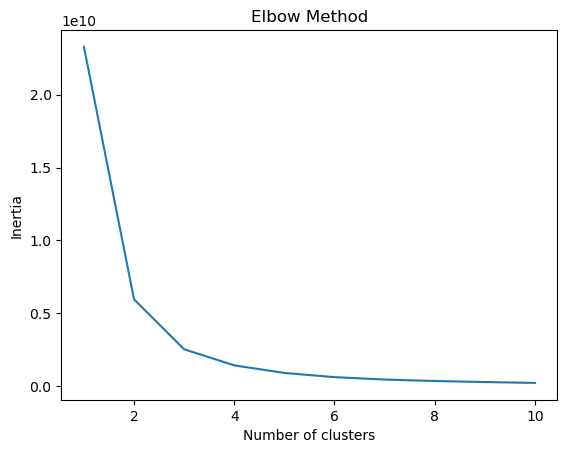

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for n in range(1, 11):  
    kmeans = KMeans(n_clusters=n, random_state=42).fit(df_standardized)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

**Silhouette Method**

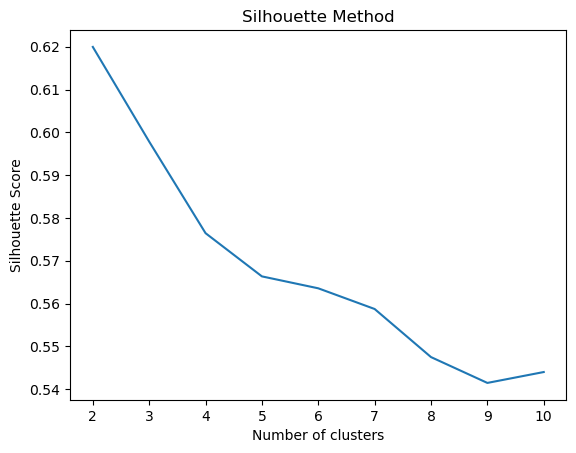

In [30]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for n in range(2, 11):  
    kmeans = KMeans(n_clusters=n, random_state=42).fit(df_standardized)
    score = silhouette_score(df_standardized, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

Now we will test if applying PCA before applying clustering can create better clusters and result in better evaluation scores

### Principal Component Analysis (PCA)

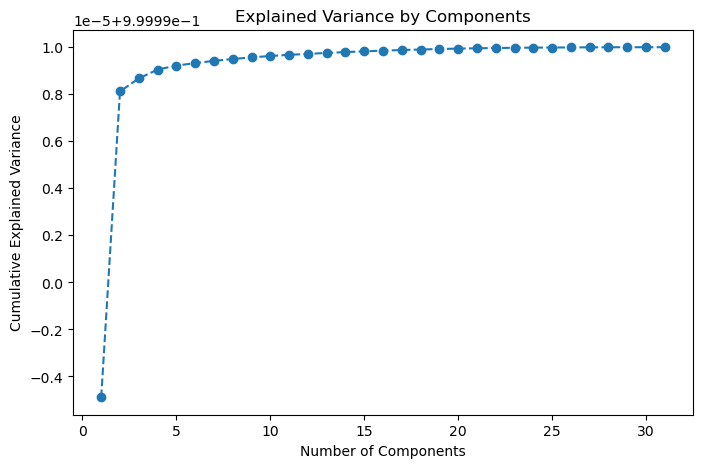

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming df_standardized is your standardized dataframe
pca = PCA().fit(df_standardized)

# Plotting the cumulative explained variance against the number of components
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

Now we will apply PCA

In [32]:
# Perform PCA on standardized data
n_components_pca = 3  
pca = PCA(n_components=n_components_pca)
df_standardized_pca = pca.fit_transform(df_standardized)


Now we can apply k means clustering the same way we did previously and do a comparison

### K means Clustering after PCA

In [33]:
# Perform KMeans clustering on the PCA-reduced data
kmeans_pca = KMeans(n_clusters=3)
kmeans_pca.fit(df_standardized_pca)
labels_kmeans_pca = kmeans_pca.labels_

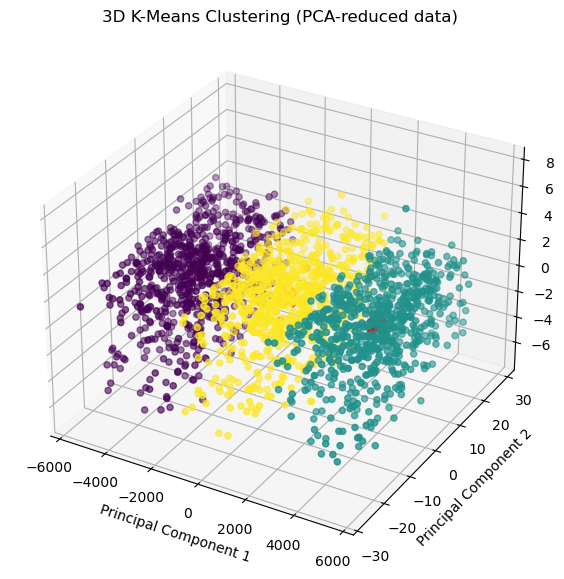

In [34]:
# Visualize the 3D scatter plot for clusters obtained from PCA-reduced data
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_standardized_pca[:, 0], df_standardized_pca[:, 1], df_standardized_pca[:, 2], c=labels_kmeans_pca, cmap='viridis', marker='o')
centroids_pca = kmeans_pca.cluster_centers_
ax.scatter(centroids_pca[:, 0], centroids_pca[:, 1], centroids_pca[:, 2], s=200, c='red', marker='X')
ax.set_title('3D K-Means Clustering (PCA-reduced data)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

In [35]:
# Calculate and print evaluation metrics for clusters obtained from PCA-reduced data
silhouette_pca = silhouette_score(df_standardized_pca, labels_kmeans_pca)
calinski_harabasz_pca = calinski_harabasz_score(df_standardized_pca, labels_kmeans_pca)
davies_bouldin_pca = davies_bouldin_score(df_standardized_pca, labels_kmeans_pca)
print(f'Silhouette Score (PCA): {silhouette_pca:.3f}')
print(f'Calinski-Harabasz Index (PCA): {calinski_harabasz_pca:.3f}')
print(f'Davies-Bouldin Index (PCA): {davies_bouldin_pca:.3f}')

Silhouette Score (PCA): 0.598
Calinski-Harabasz Index (PCA): 9028.277
Davies-Bouldin Index (PCA): 0.495


Similar scores mean there was lots of noise in the data, so its better to apply PCA in such cases.

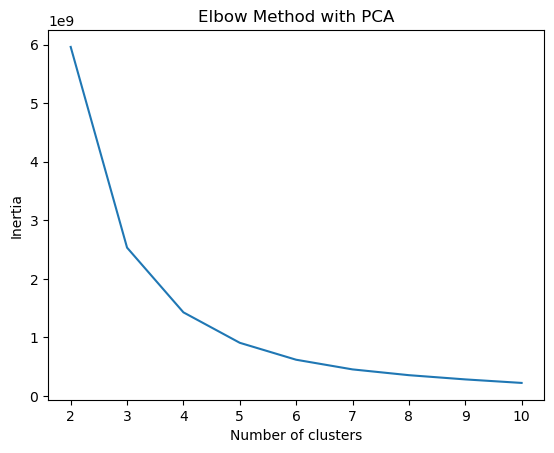

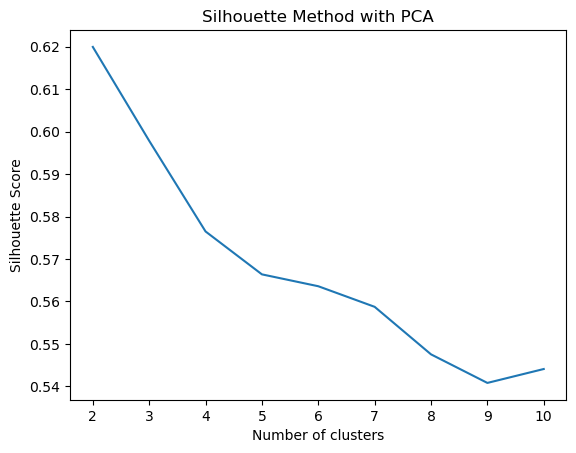

In [36]:
# If you want to visualize the silhouette scores for different numbers of clusters
inertia_pca = []
silhouette_scores_pca = []
for n in range(2, 11):
    kmeans_temp = KMeans(n_clusters=n, random_state=42).fit(df_standardized_pca)
    inertia_pca.append(kmeans_temp.inertia_)
    silhouette_scores_pca.append(silhouette_score(df_standardized_pca, kmeans_temp.labels_))

# Plotting the elbow method graph for PCA-reduced data
plt.plot(range(2, 11), inertia_pca)
plt.title('Elbow Method with PCA')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


# Plotting the silhouette scores graph for PCA-reduced data
plt.plot(range(2, 11), silhouette_scores_pca)
plt.title('Silhouette Method with PCA')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [37]:
# Assuming df_cleaned_no_outliers is your original dataset before encoding, standardization, and PCA

df_with_clusters_no_pca = df_cleaned_no_outliers.copy()
# Labels from KMeans without PCA
df_with_clusters_no_pca['Cluster_Labels_No_PCA'] = labels_kmeans  

df_with_clusters_pca = df_cleaned_no_outliers.copy()
# Labels from KMeans with PCA
df_with_clusters_pca['Cluster_Labels_PCA'] = labels_kmeans_pca  

In [38]:
# For the DataFrame without PCA
numeric_cols_no_pca = df_with_clusters_no_pca.select_dtypes(include=[np.number])
cluster_summary_no_pca = numeric_cols_no_pca.groupby('Cluster_Labels_No_PCA').mean()

# For the DataFrame with PCA
numeric_cols_pca = df_with_clusters_pca.select_dtypes(include=[np.number])
cluster_summary_pca = numeric_cols_pca.groupby('Cluster_Labels_PCA').mean()

print("Cluster Summary without PCA:\n", cluster_summary_no_pca)
print("Cluster Summary with PCA:\n", cluster_summary_pca)


Cluster Summary without PCA:
                                 ID   Year_Birth        Income   Kidhome  \
Cluster_Labels_No_PCA                                                     
0                      9510.889535  1969.241279  52673.395349  0.431686   
1                      1902.576975  1969.277108  51830.401606  0.439090   
2                      5652.923773  1968.255814  52198.131783  0.456072   

                       Teenhome    Recency    MntWines  MntFruits  \
Cluster_Labels_No_PCA                                               
0                      0.507267  46.986919  292.015988  26.917151   
1                      0.510040  49.906292  310.898260  26.631861   
2                      0.500000  50.045220  311.113695  25.409561   

                       MntMeatProducts  MntFishProducts  MntSweetProducts  \
Cluster_Labels_No_PCA                                                       
0                           163.360465        36.183140         27.593023   
1                